In [26]:
import pandas as pd
import numpy as np
import umap
import scanpy as sc
import umap

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import spearmanr

In [33]:
afatinib = sc.read_10x_mtx('../data/Afatinib_expt10/')
dmso = sc.read_10x_mtx('../data/DMSO_expt10/')

In [34]:
nn = pd.read_csv('../results/consensus_signature_gse92742_trt_lig.csv', sep=',', header=0, index_col=0).T

In [35]:
sc.pp.normalize_total(afatinib, target_sum=1e4)
sc.pp.normalize_total(dmso, target_sum=1e4)

In [36]:
afatinib = afatinib.to_df()
dmso = dmso.to_df()

In [10]:
afatinib = np.log2(afatinib+1)
dmso =np.log2(dmso+1)

In [11]:
common_genes = list(set(nn.index) & set(afatinib.columns) & set(dmso.columns))

In [12]:
afatinib = afatinib[common_genes]
dmso = dmso[common_genes]
nn = nn.loc [common_genes].T

In [37]:
model = umap.UMAP()
temp = model.fit_transform(dmso.T)

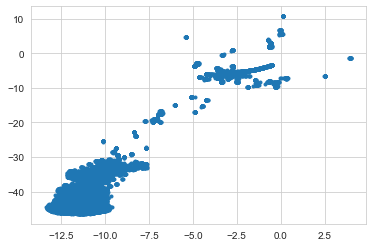

In [38]:
plt.plot(temp[:,0], temp[:,1],'.')

In [8]:
a_meta = pd.read_csv('../data/Afatinib_expt10/classifications.csv', sep=',', header=0, index_col=0)
d_meta = pd.read_csv('../data/DMSO_expt10/classifications.csv', sep=',', header=0, index_col=0)

In [9]:
for cell in list(set(d_meta['singlet_ID'])):
    samples_a = a_meta.index[a_meta['singlet_ID'] == cell]
    samples_d = d_meta.index[d_meta['singlet_ID'] == cell]
    dmso.loc[samples_d] = (dmso.loc[samples_d] - dmso.loc[samples_d].mean()) / dmso.loc[samples_d].std()
    afatinib.loc[samples_a] = (afatinib.loc[samples_a] - dmso.loc[samples_d].mean()) / dmso.loc[samples_d].std()

In [11]:
set(a_meta['singlet_ID']) - set(d_meta['singlet_ID'])

{'NCIH1648_LUNG'}

In [14]:
a_sim = pd.concat([afatinib.T, nn.T], 1)
a_sim = pd.DataFrame(spearmanr(a_sim)[0], index=a_sim.columns, columns=a_sim.columns)
a_sim = a_sim.loc[nn.index, afatinib.index]

In [15]:
d_sim = pd.concat([dmso.T, nn.T], 1)
d_sim = pd.DataFrame(spearmanr(d_sim)[0], index=d_sim.columns, columns=d_sim.columns)
d_sim = d_sim.loc[nn.index, dmso.index]

(array([   6.,   45.,  196.,  762., 1544., 1463.,  864.,  269.,   47.,
           9.]),
 array([-0.14280172, -0.12064314, -0.09848456, -0.07632598, -0.0541674 ,
        -0.03200882, -0.00985025,  0.01230833,  0.03446691,  0.05662549,
         0.07878407]),
 <a list of 10 Patch objects>)

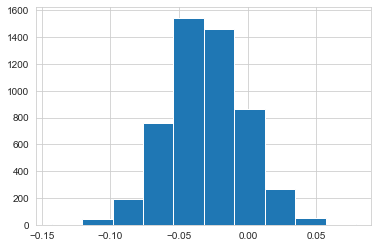

In [17]:
plt.hist(d_sim.loc["EGF"].sort_values())

(array([ 19.,  86., 278., 602., 947., 909., 622., 258.,  69.,  17.]),
 array([-0.13805356, -0.11818832, -0.09832308, -0.07845784, -0.0585926 ,
        -0.03872736, -0.01886212,  0.00100312,  0.02086835,  0.04073359,
         0.06059883]),
 <a list of 10 Patch objects>)

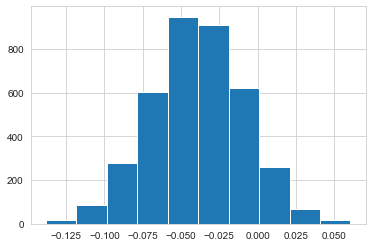

In [18]:
plt.hist(a_sim.loc["EGF"].sort_values())

In [25]:
d_sim.min(1)['EGF']

-0.14280171973229963

In [24]:
(d_sim.mean(1) - a_sim.mean(1)).sort_values()

EDN2      -0.108346
NTS       -0.086062
THBD      -0.069351
TNFSF13   -0.068919
BMP7      -0.064511
             ...   
COL4A1     0.220800
VIP        0.221833
HGF        0.226379
CXCL5      0.226911
UTS2       0.238058
Length: 213, dtype: float64

In [28]:
d_sim.mean(1)['UTS2']

0.1358958719866639